In [1]:
import os
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
log_path = 'logs/210522_15.40.03/'

log_name = 'train.log'
env_name = 'int_env.txt'

figw_name = 'well-being.png'
figh_name = 'homeo-var.png'
csv_name = 'data.csv'


In [3]:
log_file = os.path.join(log_path, log_name)
env_file = os.path.join(log_path, env_name)

figw_file = os.path.join(log_path, figw_name)
figh_file = os.path.join(log_path, figh_name)
csv_file = os.path.join(log_path, csv_name)

drop_prefix = lambda data: list(map(lambda string: re.split(r"= ", string)[-1], data))
extract_float = lambda data: list(map(float, data))
convert_to_float = lambda data: list(map(lambda string: float(re.search(r"-?\d+\.?\d*", string).group()), data))

In [5]:
with open(log_file) as log:
    log_data = np.array(log.readlines()[1:-2])

with open(env_file) as env:
    env_data = env.readlines()[1:]

log_data = np.loadtxt(fname=log_data, dtype=str, delimiter=',', usecols=[0,1,2,3])

state = drop_prefix(log_data[:,0])
energy = extract_float(env_data[1::3])
comfort = extract_float(env_data[2::3])
well_being = convert_to_float(log_data[:,1])
reward = convert_to_float(log_data[:,2])
action = drop_prefix(log_data[:,3])
    

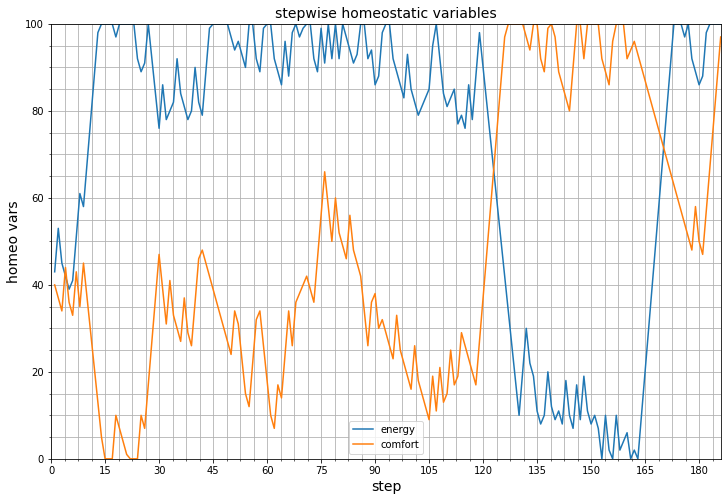

In [8]:
fig1, ax1 = plt.subplots(figsize=(12,8))
step = np.arange(1, len(energy) + 1)
ax1.plot(step, energy)
ax1.plot(step, comfort)

ax1.set_title('stepwise homeostatic variables', fontsize=14)
ax1.set_xlabel('step', fontsize=14)
ax1.set_ylabel('homeo vars', fontsize=14)
ax1.legend(['energy','comfort'])

ax1.minorticks_on() 
ax1.set_xlim(0, len(energy))
ax1.set_ylim(0, 100)
ax1.grid(which='both', axis='both')

xstart, xend = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(xstart, xend, 15)) 
# ax1.yaxis.set_ticks(np.arange(ystart, yend, 5))

plt.savefig(figh_file, dpi=144)
plt.show()
plt.close()

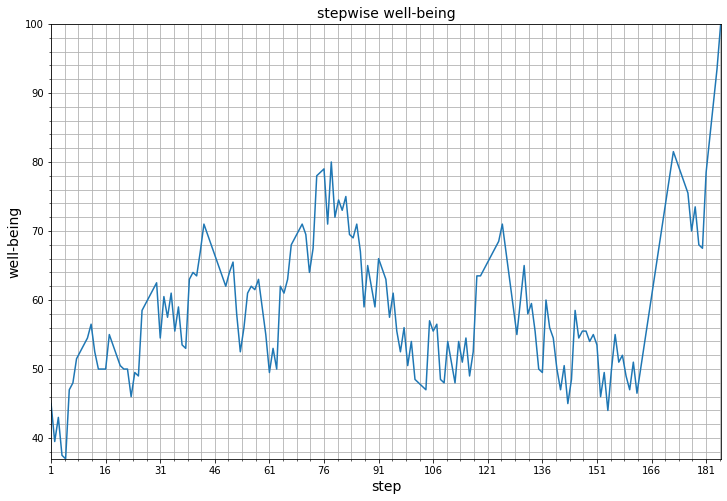

In [9]:
fig2, ax2 = plt.subplots(figsize=(12,8))
step = np.arange(1, len(well_being) + 1)
ax2.plot(step, well_being)

ax2.set_title('stepwise well-being', fontsize=14)
ax2.set_xlabel('step', fontsize=14)
ax2.set_ylabel('well-being', fontsize=14)

ax2.minorticks_on() 
ax2.set_xlim(1, len(well_being))
ax2.set_ylim(np.floor(min(well_being)), 100)
ax2.grid(which='both', axis='both')

xstart, xend = ax2.get_xlim()
ax2.xaxis.set_ticks(np.arange(xstart, xend, 15)) 
# ax2.yaxis.set_ticks(np.arange(ystart, yend, 5))

plt.savefig(figw_file, dpi=144)
plt.show()
plt.close()


In [10]:
df = pd.DataFrame(data=np.array([state, well_being, reward, action]).T, columns=['state', 'well-being', 'reward', 'action'])

df.to_csv(csv_file)